In [162]:
from allensdk.brain_observatory.behavior.behavior_project_cache import BehaviorProjectCache as bpc
from visual_behavior.translator.allensdk_sessions import sdk_utils
import visual_behavior.utilities as vbu
import visual_behavior.database as db
import scipy.misc
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm

import visual_behavior.visualization.qc.data_loading as dl

import matplotlib.pyplot as plt

from multiprocessing import Pool

In [1]:
import dro.modules.utilities as dro_ut
import dro.modules.plotting as dro_plots

In [79]:
%matplotlib notebook
%widescreen
sns.set_context("notebook")

In [149]:
fig_savepath = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\qc_plots\experiment_plots\omitted_stimulus_responses'.replace('\\','/')

In [4]:
manifest_path = "/home/dougo/manifest.json"
cache = bpc.from_lims(manifest=manifest_path)

In [5]:
ordered_cache = cache.get_experiment_table().sort_values(by='date_of_acquisition', ascending=False).reset_index()

container_df = dl.build_container_df()
filtered_container_list = dl.get_filtered_ophys_container_ids()

In [167]:
def load_session(ophys_experiment_id):
    manifest_path = "/home/dougo/manifest.json"
    cache = bpc.from_lims(manifest=manifest_path)

    session = dl.get_sdk_session_obj(ophys_experiment_id)
    session.eye_data = vbu.EyeTrackingData(sdk_utils.get_osid_from_oeid(ophys_experiment_id, cache))
    
    return session

In [155]:
def make_plot(session):
    
    try:
        running_responses = dro_ut.event_triggered_response(
            session.running_data_df,
            parameter = 'speed',
            event_times = session.stimulus_presentations.query('omitted == True')['start_time'],
            time_key = 'index'
        )
    except:
        running_responses = None

    try:
        pupil_responses = dro_ut.event_triggered_response(
            session.eye_data.ellipse_fits['pupil'],
            parameter = 'blink_corrected_area',
            event_times = session.stimulus_presentations.query('omitted == True')['start_time'],
            time_key = 'time'
        )
    except:
        pupil_responses = None

    fig,ax = plt.subplots(3,1,figsize=(11,6), sharex=True)
    titles = ['pupil area','running speed','licks']

    if pupil_responses is not None:
        dro_plots.event_triggered_response_plot(
            dro_ut.convert_to_fraction(pupil_responses),
            fig=fig,
            ax_index=0,
            x_value='time',
            y_values = [col for col in running_responses.columns if col != 'time'],
            value_name = 'pupil area\nfractional change'
        )
        ax[0].set_ylim(-0.15,0.15)

    if running_responses is not None:
        dro_plots.event_triggered_response_plot(
            running_responses,
            fig=fig,
            ax_index=1,
            x_value='time',
            y_values = [col for col in running_responses.columns if col != 'time'],
            value_name = 'running\nspeed (cm/s)'
        )

    dro_plots.event_triggered_raster(
        session.licks,
        x_value='time',
        event_times = session.stimulus_presentations.query('omitted == True')['start_time'],
        fig=fig,
        ax_index=2,
        value_name = 'omitted\nflash\npresentation'
    )
    
    ax[2].set_xlabel('time from omitted flash (s)')

    for ii,axis in enumerate(fig.get_axes()):
        dro_plots.designate_flashes(axis, omit=0, pre_color='blue',post_color='blue')
        axis.set_xlim(-5,5)
        axis.set_title(titles[ii])
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    title = 'session type = {}, experiment ID = {}, container ID = {}'.format(session.metadata['session_type'],session.metadata['ophys_experiment_id'],session.metadata['experiment_container_id'])
    fig.suptitle(title)
    
    return fig

In [175]:
def make_and_save_plot(experiment_id):
    print('on experiment ID {}'.format(experiment_id))
    session = load_session(experiment_id)
    fig = make_plot(session)
    filename = 'container_ID_{}__experiment_ID_{}_session type_{}.png'.format(session.metadata['experiment_container_id'],session.metadata['ophys_experiment_id'],session.metadata['session_type'],)
    print('filename = {}'.format(filename))
    fig.savefig(os.path.join(fig_savepath,filename),dpi=200)
    print('done with experiment ID {}'.format(experiment_id))

<IPython.core.display.Javascript object>


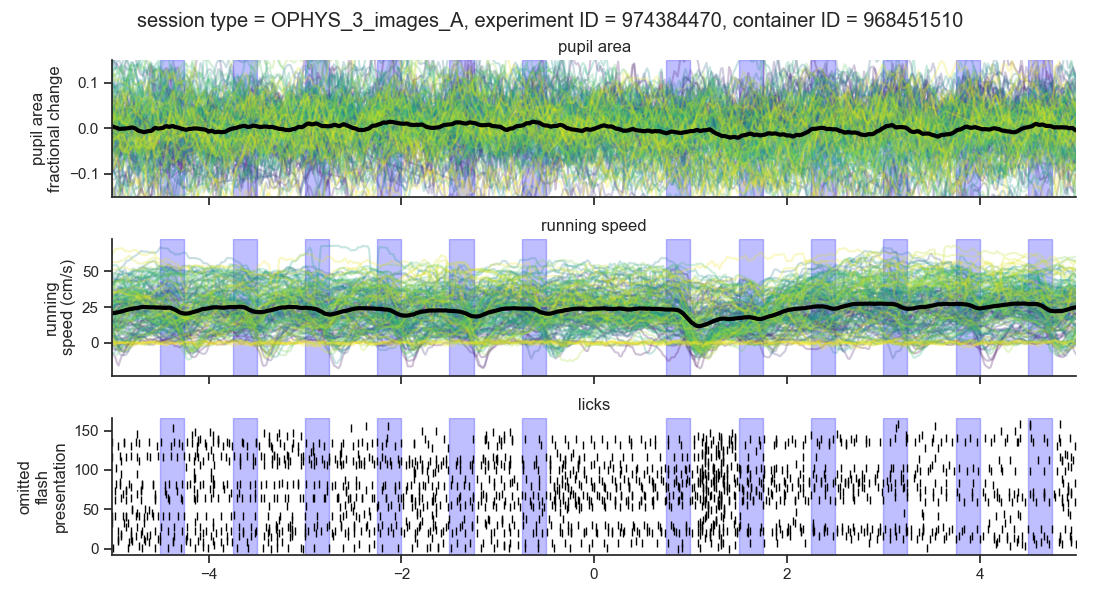

In [154]:
experiment_id = 974384470
make_and_save_plot(experiment_id)

In [165]:
experiment_ids = dl.get_filtered_ophys_experiment_table()['ophys_experiment_id'].values

In [169]:
with Pool(16) as pool:
    pool.map(make_and_save_plot, experiment_ids)

on experiment ID 792815735
on experiment ID 884218326
on experiment ID 796308505
on experiment ID 830700800
on experiment ID 943151552
on experiment ID 879331157
on experiment ID 873968820
on experiment ID 939327156
on experiment ID 877696762
on experiment ID 934476801
on experiment ID 884221469
on experiment ID 967876201
on experiment ID 889777243
on experiment ID 935440133
on experiment ID 943151492
on experiment ID 923100531


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_902748564_session type_OPHYS_6_images_B__experiment_ID_889777243.png
done with experiment ID 889777243
on experiment ID 896160394


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_791352433_session type_OPHYS_6_images_B__experiment_ID_796308505.png
filename = container_ID_957570596_session type_OPHYS_3_images_B__experiment_ID_967876201.png
done with experiment ID 796308505
on experiment ID 798404219
done with experiment ID 967876201
on experiment ID 968651977


<IPython.core.display.Javascript object>

filename = container_ID_876693090_session type_OPHYS_2_images_A_passive__experiment_ID_877696762.png


<IPython.core.display.Javascript object>

done with experiment ID 877696762
on experiment ID 879332693


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_791352433_session type_OPHYS_1_images_A__experiment_ID_792815735.png
filename = container_ID_930024022_session type_OPHYS_5_images_B_passive__experiment_ID_943151492.png
filename = container_ID_930024022_session type_OPHYS_1_images_A__experiment_ID_935440133.png
done with experiment ID 792815735
on experiment ID 795073741
done with experiment ID 943151492
on experiment ID 919314793
done with experiment ID 935440133
on experiment ID 936494970
filename = container_ID_863992815_session type_OPHYS_1_images_A__experiment_ID_873968820.png
done with experiment ID 873968820
on experiment ID 875045489
filename = container_ID_902748564_session type_OPHYS_1_images_A__experiment_ID_884221469.png
filename = container_ID_825183217_session type_OPHYS_5_images_B_passive__experiment_ID_830700800.png
done with experiment ID 830700800
on experiment ID 833631914
done with experiment ID 884221469
on experiment ID 885067826
filename = container_ID_869781307_session type_OPHYS_4_image

<IPython.core.display.Javascript object>

done with experiment ID 879331157
on experiment ID 880374622
filename = container_ID_930022332_session type_OPHYS_5_images_B_passive__experiment_ID_943151552.png
done with experiment ID 934476801
on experiment ID 938001540
done with experiment ID 923100531
on experiment ID 924108253
done with experiment ID 943151552
on experiment ID 944366183
filename = container_ID_930022332_session type_OPHYS_1_images_A__experiment_ID_939327156.png
done with experiment ID 939327156
on experiment ID 940354166


<IPython.core.display.Javascript object>

filename = container_ID_876693090_session type_OPHYS_5_images_B_passive__experiment_ID_884218326.png
done with experiment ID 884218326
on experiment ID 873972085


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_902748564_session type_OPHYS_4_images_B__experiment_ID_896160394.png


<IPython.core.display.Javascript object>

done with experiment ID 896160394
on experiment ID 965224600


<IPython.core.display.Javascript object>

filename = container_ID_902748564_session type_OPHYS_2_images_A_passive__experiment_ID_885067826.png


<IPython.core.display.Javascript object>

done with experiment ID 885067826
on experiment ID 885933191
filename = container_ID_957570596_session type_OPHYS_4_images_A__experiment_ID_968651977.png


<IPython.core.display.Javascript object>

done with experiment ID 968651977
on experiment ID 969809655


<IPython.core.display.Javascript object>

filename = container_ID_791352433_session type_OPHYS_3_images_A__experiment_ID_795073741.png


<IPython.core.display.Javascript object>

done with experiment ID 795073741
on experiment ID 795953296
filename = container_ID_791352433_session type_OPHYS_2_images_A_passive__experiment_ID_798404219.png
filename = container_ID_825183217_session type_OPHYS_6_images_B__experiment_ID_833631914.png
done with experiment ID 798404219
on experiment ID 826587940
done with experiment ID 833631914
on experiment ID 836258957


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_930024022_session type_OPHYS_3_images_A__experiment_ID_936494970.png


<IPython.core.display.Javascript object>

done with experiment ID 936494970
on experiment ID 940352367


<IPython.core.display.Javascript object>

filename = container_ID_915584942_session type_OPHYS_1_images_B__experiment_ID_919314793.png
done with experiment ID 919314793
on experiment ID 920211809


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_876693090_session type_OPHYS_1_images_A__experiment_ID_879332693.png
filename = container_ID_869781307_session type_OPHYS_5_images_B_passive__experiment_ID_880374622.png
done with experiment ID 879332693
on experiment ID 880375092
filename = container_ID_928325203_session type_OPHYS_4_images_A__experiment_ID_938001540.png
done with experiment ID 938001540
on experiment ID 939319851


<IPython.core.display.Javascript object>

done with experiment ID 880374622
on experiment ID 880961028
filename = container_ID_930022332_session type_OPHYS_6_images_B__experiment_ID_944366183.png
filename = container_ID_957570596_session type_OPHYS_1_images_B__experiment_ID_965224600.png
done with experiment ID 944366183
on experiment ID 932331541
filename = container_ID_863992815_session type_OPHYS_2_images_A_passive__experiment_ID_875045489.png
done with experiment ID 965224600
on experiment ID 967008454


<IPython.core.display.Javascript object>

filename = container_ID_915584942_session type_OPHYS_5_images_A_passive__experiment_ID_924108253.png
done with experiment ID 875045489
on experiment ID 877018118


<IPython.core.display.Javascript object>

done with experiment ID 924108253
on experiment ID 929132798


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_930022332_session type_OPHYS_2_images_A_passive__experiment_ID_940354166.png
done with experiment ID 940354166
on experiment ID 940852658
filename = container_ID_791352433_session type_OPHYS_4_images_B__experiment_ID_795953296.png
done with experiment ID 795953296
on experiment ID 796108483
filename = container_ID_902748564_session type_OPHYS_3_images_A__experiment_ID_885933191.png
filename = container_ID_869781307_session type_OPHYS_1_images_A__experiment_ID_873972085.png
filename = container_ID_825183217_session type_OPHYS_3_images_A__experiment_ID_836258957.png
done with experiment ID 885933191
on experiment ID 888666715
done with experiment ID 873972085
on experiment ID 877022592
filename = container_ID_825183217_session type_OPHYS_1_images_A__experiment_ID_826587940.png
filename = container_ID_957570596_session type_OPHYS_5_images_A_passive__experiment_ID_969809655.png
done with experiment ID 836258957
on experiment ID 836911939


<IPython.core.display.Javascript object>

done with experiment ID 826587940
on experiment ID 830093338
done with experiment ID 969809655
on experiment ID 972200901


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_930024022_session type_OPHYS_4_images_B__experiment_ID_940352367.png
done with experiment ID 940352367
on experiment ID 940852112


<IPython.core.display.Javascript object>

filename = container_ID_957570596_session type_OPHYS_2_images_B_passive__experiment_ID_967008454.png
done with experiment ID 967008454
on experiment ID 853962951


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_863992815_session type_OPHYS_3_images_A__experiment_ID_877018118.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

done with experiment ID 877018118
on experiment ID 878358326
filename = container_ID_869781307_session type_OPHYS_6_images_B__experiment_ID_880961028.png
done with experiment ID 880961028
on experiment ID 869969393
filename = container_ID_915584942_session type_OPHYS_2_images_B_passive__experiment_ID_920211809.png
done with experiment ID 920211809
on experiment ID 920976741
filename = container_ID_825183217_session type_OPHYS_4_images_B__experiment_ID_830093338.png
filename = container_ID_957570596_session type_OPHYS_6_images_A__experiment_ID_972200901.png
filename = container_ID_791352433_session type_OPHYS_5_images_B_passive__experiment_ID_796108483.png
done with experiment ID 830093338
on experiment ID 863735602
done with experiment ID 972200901
on experiment ID 903405627


<IPython.core.display.Javascript object>

done with experiment ID 796108483
on experiment ID 962473308
filename = container_ID_928325203_session type_OPHYS_5_images_A_passive__experiment_ID_939319851.png
done with experiment ID 939319851
on experiment ID 940354181
filename = container_ID_928325203_session type_OPHYS_1_images_B__experiment_ID_932331541.png


<IPython.core.display.Javascript object>

done with experiment ID 932331541
on experiment ID 933338719
filename = container_ID_876693090_session type_OPHYS_4_images_B__experiment_ID_880375092.png
done with experiment ID 880375092
on experiment ID 882935355
filename = container_ID_930022332_session type_OPHYS_3_images_A__experiment_ID_940852658.png
filename = container_ID_915584942_session type_OPHYS_6_images_A__experiment_ID_929132798.png
done with experiment ID 929132798
done with experiment ID 940852658
on experiment ID 942043482
on experiment ID 853328115


<IPython.core.display.Javascript object>

filename = container_ID_902748564_session type_OPHYS_5_images_B_passive__experiment_ID_888666715.png
filename = container_ID_825183217_session type_OPHYS_2_images_A_passive__experiment_ID_836911939.png
done with experiment ID 888666715
on experiment ID 965928394
done with experiment ID 836911939
on experiment ID 856096766


<IPython.core.display.Javascript object>

filename = container_ID_869781307_session type_OPHYS_2_images_A_passive__experiment_ID_877022592.png
filename = container_ID_930024022_session type_OPHYS_6_images_B__experiment_ID_940852112.png
done with experiment ID 877022592
on experiment ID 878363088
done with experiment ID 940852112
on experiment ID 943134119
filename = container_ID_848390542_session type_OPHYS_4_images_B__experiment_ID_853962951.png
done with experiment ID 853962951
on experiment ID 854703305


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_863992815_session type_OPHYS_6_images_B__experiment_ID_878358326.png


<IPython.core.display.Javascript object>

done with experiment ID 878358326
on experiment ID 958435448


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_969421516_session type_OPHYS_3_images_B__experiment_ID_962473308.png
done with experiment ID 962473308
on experiment ID 963394081


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_895259496_session type_OPHYS_4_images_A__experiment_ID_903405627.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

done with experiment ID 903405627
on experiment ID 904155155
filename = container_ID_848390542_session type_OPHYS_3_images_A__experiment_ID_853328115.png
filename = container_ID_848390542_session type_OPHYS_2_images_A_passive__experiment_ID_863735602.png
filename = container_ID_928325203_session type_OPHYS_6_images_A__experiment_ID_940354181.png
filename = container_ID_863992815_session type_OPHYS_5_images_B_passive__experiment_ID_869969393.png
done with experiment ID 853328115
on experiment ID 965930965
done with experiment ID 863735602
on experiment ID 899085531
filename = container_ID_969421516_session type_OPHYS_6_images_A__experiment_ID_965928394.png
done with experiment ID 940354181
on experiment ID 788490510
done with experiment ID 869969393
on experiment ID 973927944


<IPython.core.display.Javascript object>

done with experiment ID 965928394
on experiment ID 848697604


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_915584942_session type_OPHYS_3_images_B__experiment_ID_920976741.png
filename = container_ID_928325203_session type_OPHYS_2_images_B_passive__experiment_ID_933338719.png
done with experiment ID 920976741
on experiment ID 977937585
done with experiment ID 933338719
on experiment ID 956820482
filename = container_ID_930022332_session type_OPHYS_4_images_B__experiment_ID_942043482.png
done with experiment ID 942043482
on experiment ID 891054695
filename = container_ID_929913236_session type_OPHYS_2_images_A_passive__experiment_ID_943134119.png
filename = container_ID_876693090_session type_OPHYS_6_images_B__experiment_ID_882935355.png
done with experiment ID 943134119
on experiment ID 948507789
done with experiment ID 882935355
on experiment ID 894726001


<IPython.core.display.Javascript object>

filename = container_ID_848390542_session type_OPHYS_5_images_B_passive__experiment_ID_854703305.png
done with experiment ID 854703305
on experiment ID 855577488
filename = container_ID_869781307_session type_OPHYS_3_images_A__experiment_ID_878363088.png
done with experiment ID 878363088
on experiment ID 929136322


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_845588020_session type_OPHYS_6_images_B__experiment_ID_856096766.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

done with experiment ID 856096766
on experiment ID 862848066
filename = container_ID_782536745_session type_OPHYS_6_images_B__experiment_ID_788490510.png
done with experiment ID 788490510
on experiment ID 792812544


<IPython.core.display.Javascript object>

filename = container_ID_969421516_session type_OPHYS_2_images_B_passive__experiment_ID_963394081.png
done with experiment ID 963394081
on experiment ID 964440177
filename = container_ID_895259496_session type_OPHYS_5_images_A_passive__experiment_ID_904155155.png
done with experiment ID 904155155
on experiment ID 908350502
filename = container_ID_957024596_session type_OPHYS_5_images_B_passive__experiment_ID_965930965.png
done with experiment ID 965930965
on experiment ID 967005387


<IPython.core.display.Javascript object>

filename = container_ID_895259496_session type_OPHYS_1_images_B__experiment_ID_899085531.png
filename = container_ID_929913236_session type_OPHYS_5_images_B_passive__experiment_ID_958435448.png
done with experiment ID 899085531
on experiment ID 901559828


<IPython.core.display.Javascript object>

done with experiment ID 958435448
on experiment ID 961283857


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_968451510_session type_OPHYS_2_images_A_passive__experiment_ID_973927944.png
filename = container_ID_929913236_session type_OPHYS_3_images_A__experiment_ID_948507789.png
done with experiment ID 973927944
on experiment ID 974384470
done with experiment ID 948507789
on experiment ID 950833329


<IPython.core.display.Javascript object>

filename = container_ID_848390542_session type_OPHYS_6_images_B__experiment_ID_855577488.png
filename = container_ID_911248946_session type_OPHYS_5_images_A_passive__experiment_ID_929136322.png


<IPython.core.display.Javascript object>

filename = container_ID_845588020_session type_OPHYS_1_images_A__experiment_ID_848697604.png


<IPython.core.display.Javascript object>

done with experiment ID 929136322
on experiment ID 929591721
done with experiment ID 855577488
on experiment ID 859147033
done with experiment ID 848697604
on experiment ID 849203586
filename = container_ID_968451510_session type_OPHYS_5_images_B_passive__experiment_ID_977937585.png
filename = container_ID_902748650_session type_OPHYS_2_images_A_passive__experiment_ID_891054695.png
done with experiment ID 977937585
on experiment ID 949637002
done with experiment ID 891054695


<IPython.core.display.Javascript object>

on experiment ID 891996193


<IPython.core.display.Javascript object>

filename = container_ID_939523510_session type_OPHYS_4_images_B__experiment_ID_956820482.png
filename = container_ID_782536745_session type_OPHYS_4_images_B__experiment_ID_792812544.png
done with experiment ID 792812544
done with experiment ID 956820482
on experiment ID 796106850
on experiment ID 957655294


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_902748650_session type_OPHYS_6_images_B__experiment_ID_894726001.png
filename = container_ID_969421516_session type_OPHYS_4_images_A__experiment_ID_964440177.png
done with experiment ID 894726001
on experiment ID 915136302
filename = container_ID_895259496_session type_OPHYS_6_images_A__experiment_ID_908350502.png
done with experiment ID 964440177
on experiment ID 965228771
done with experiment ID 908350502
on experiment ID 960953590
filename = container_ID_957024596_session type_OPHYS_6_images_B__experiment_ID_967005387.png


<IPython.core.display.Javascript object>

done with experiment ID 967005387
on experiment ID 775614751
filename = container_ID_845588020_session type_OPHYS_4_images_B__experiment_ID_862848066.png


<IPython.core.display.Javascript object>

done with experiment ID 862848066
on experiment ID 864370674
filename = container_ID_957024596_session type_OPHYS_2_images_A_passive__experiment_ID_961283857.png


<IPython.core.display.Javascript object>

done with experiment ID 961283857
on experiment ID 962471831


<IPython.core.display.Javascript object>

filename = container_ID_895259496_session type_OPHYS_3_images_B__experiment_ID_901559828.png
done with experiment ID 901559828
on experiment ID 902487182
filename = container_ID_968451510_session type_OPHYS_3_images_A__experiment_ID_974384470.png


<IPython.core.display.Javascript object>

filename = container_ID_929913236_session type_OPHYS_4_images_B__experiment_ID_950833329.png
done with experiment ID 974384470
on experiment ID 974945686
done with experiment ID 950833329
on experiment ID 953443028


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_848390542_session type_OPHYS_1_images_A__experiment_ID_859147033.png
filename = container_ID_782536745_session type_OPHYS_1_images_A__experiment_ID_775614751.png
filename = container_ID_911248946_session type_OPHYS_4_images_A__experiment_ID_929591721.png
done with experiment ID 775614751
on experiment ID 778644591


<IPython.core.display.Javascript object>

done with experiment ID 859147033
on experiment ID 956903375


<IPython.core.display.Javascript object>

done with experiment ID 929591721
on experiment ID 930785836


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_782536745_session type_OPHYS_5_images_B_passive__experiment_ID_796106850.png
done with experiment ID 796106850
on experiment ID 972701564
filename = container_ID_902748650_session type_OPHYS_3_images_A__experiment_ID_891996193.png
done with experiment ID 891996193
on experiment ID 892805315


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_911248946_session type_OPHYS_1_images_B__experiment_ID_915136302.png
filename = container_ID_939523510_session type_OPHYS_1_images_A__experiment_ID_949637002.png


<IPython.core.display.Javascript object>

filename = container_ID_845588020_session type_OPHYS_2_images_A_passive__experiment_ID_849203586.png
done with experiment ID 915136302
on experiment ID 918566488
done with experiment ID 949637002
on experiment ID 950852107


<IPython.core.display.Javascript object>

done with experiment ID 849203586
on experiment ID 855582981
filename = container_ID_969421516_session type_OPHYS_5_images_A_passive__experiment_ID_965228771.png
done with experiment ID 965228771
on experiment ID 960960480
filename = container_ID_969421516_session type_OPHYS_1_images_B__experiment_ID_960953590.png
filename = container_ID_957024596_session type_OPHYS_3_images_A__experiment_ID_962471831.png


<IPython.core.display.Javascript object>

filename = container_ID_782536745_session type_OPHYS_2_images_A_passive__experiment_ID_778644591.png
done with experiment ID 960953590
on experiment ID 892799212
done with experiment ID 962471831
on experiment ID 965228792
done with experiment ID 778644591
on experiment ID 822641265
filename = container_ID_939523510_session type_OPHYS_6_images_B__experiment_ID_957655294.png


<IPython.core.display.Javascript object>

done with experiment ID 957655294
on experiment ID 958681110


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_895259496_session type_OPHYS_2_images_B_passive__experiment_ID_902487182.png
filename = container_ID_929913236_session type_OPHYS_6_images_B__experiment_ID_953443028.png
filename = container_ID_968451510_session type_OPHYS_4_images_B__experiment_ID_974945686.png
done with experiment ID 902487182
on experiment ID 826585773
done with experiment ID 953443028
on experiment ID 811456530
done with experiment ID 974945686
on experiment ID 977132456
filename = container_ID_911248946_session type_OPHYS_6_images_A__experiment_ID_930785836.png
filename = container_ID_845588020_session type_OPHYS_3_images_A__experiment_ID_864370674.png
done with experiment ID 930785836
on experiment ID 955276580
done with experiment ID 864370674
on experiment ID 940352989
filename = container_ID_968451510_session type_OPHYS_1_images_A__experiment_ID_972701564.png
done with experiment ID 972701564
on experiment ID 820307518


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_941373529_session type_OPHYS_2_images_B_passive__experiment_ID_956903375.png


<IPython.core.display.Javascript object>

done with experiment ID 956903375
on experiment ID 957652800


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_957024596_session type_OPHYS_4_images_B__experiment_ID_965228792.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

done with experiment ID 965228792
on experiment ID 964955813


<IPython.core.display.Javascript object>

filename = container_ID_941373529_session type_OPHYS_6_images_A__experiment_ID_960960480.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

done with experiment ID 960960480
on experiment ID 889771676


<IPython.core.display.Javascript object>

filename = container_ID_890047007_session type_OPHYS_4_images_B__experiment_ID_892799212.png
filename = container_ID_911248946_session type_OPHYS_2_images_B_passive__experiment_ID_918566488.png


<IPython.core.display.Javascript object>

done with experiment ID 892799212
on experiment ID 894727297
done with experiment ID 918566488
on experiment ID 919325924
filename = container_ID_902748650_session type_OPHYS_4_images_B__experiment_ID_892805315.png
done with experiment ID 892805315
on experiment ID 893831526


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_803516615_session type_OPHYS_2_images_A_passive__experiment_ID_822641265.png
done with experiment ID 822641265
on experiment ID 823392290
filename = container_ID_941373529_session type_OPHYS_1_images_B__experiment_ID_955276580.png
done with experiment ID 955276580
on experiment ID 842975542
filename = container_ID_845588020_session type_OPHYS_5_images_B_passive__experiment_ID_855582981.png
filename = container_ID_968451510_session type_OPHYS_6_images_B__experiment_ID_977132456.png
done with experiment ID 855582981
on experiment ID 846487947
filename = container_ID_929913236_session type_OPHYS_1_images_A__experiment_ID_940352989.png
done with experiment ID 977132456
on experiment ID 850489605
filename = container_ID_939523510_session type_OPHYS_2_images_A_passive__experiment_ID_950852107.png
done with experiment ID 940352989
on experiment ID 842973730
filename = container_ID_803517529_session type_OPHYS_2_images_A_passive__experiment_ID_811456530.png
filename = c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_803516615_session type_OPHYS_6_images_B__experiment_ID_826585773.png


<IPython.core.display.Javascript object>

done with experiment ID 826585773
on experiment ID 806456687


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_876693136_session type_OPHYS_1_images_A__experiment_ID_842975542.png
filename = container_ID_890047007_session type_OPHYS_1_images_A__experiment_ID_889771676.png


<IPython.core.display.Javascript object>

done with experiment ID 842975542
on experiment ID 843520488


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

done with experiment ID 889771676
on experiment ID 891052180
filename = container_ID_957366099_session type_OPHYS_2_images_B_passive__experiment_ID_964955813.png
done with experiment ID 964955813
on experiment ID 965231035


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_890047007_session type_OPHYS_6_images_B__experiment_ID_894727297.png
done with experiment ID 894727297
on experiment ID 898747791


<IPython.core.display.Javascript object>

filename = container_ID_911248946_session type_OPHYS_3_images_B__experiment_ID_919325924.png
done with experiment ID 919325924
on experiment ID 848698709


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_941373529_session type_OPHYS_4_images_A__experiment_ID_959337347.png
filename = container_ID_846213087_session type_OPHYS_3_images_A__experiment_ID_850489605.png
done with experiment ID 959337347
on experiment ID 960351917
done with experiment ID 850489605
on experiment ID 851056106
filename = container_ID_803517529_session type_OPHYS_6_images_B__experiment_ID_813083478.png
done with experiment ID 813083478
on experiment ID 815652334


<IPython.core.display.Javascript object>

filename = container_ID_812858755_session type_OPHYS_1_images_A__experiment_ID_822647135.png
done with experiment ID 822647135
on experiment ID 825130141
filename = container_ID_876693136_session type_OPHYS_6_images_B__experiment_ID_846487947.png
done with experiment ID 846487947
on experiment ID 847241639
filename = container_ID_803516615_session type_OPHYS_3_images_A__experiment_ID_823392290.png
filename = container_ID_902748650_session type_OPHYS_5_images_B_passive__experiment_ID_893831526.png
done with experiment ID 823392290
on experiment ID 825120601
done with experiment ID 893831526
on experiment ID 967008471
filename = container_ID_803517529_session type_OPHYS_1_images_A__experiment_ID_806456687.png
done with experiment ID 806456687
on experiment ID 807752719
filename = container_ID_843049827_session type_OPHYS_1_images_A__experiment_ID_842973730.png
done with experiment ID 842973730
on experiment ID 843519218


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_939523510_session type_OPHYS_3_images_A__experiment_ID_953452368.png
done with experiment ID 953452368
on experiment ID 958435363
filename = container_ID_902748650_session type_OPHYS_1_images_A__experiment_ID_889772922.png
done with experiment ID 889772922
on experiment ID 965218395


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_957366099_session type_OPHYS_3_images_B__experiment_ID_965231035.png
done with experiment ID 965231035
on experiment ID 967007328


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_890047007_session type_OPHYS_2_images_A_passive__experiment_ID_891052180.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

done with experiment ID 891052180
on experiment ID 891994418
filename = container_ID_876693136_session type_OPHYS_2_images_A_passive__experiment_ID_843520488.png
done with experiment ID 843520488
on experiment ID 844395446


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_803516615_session type_OPHYS_4_images_B__experiment_ID_825120601.png
done with experiment ID 825120601
on experiment ID 825623170
filename = container_ID_812858755_session type_OPHYS_2_images_A_passive__experiment_ID_815652334.png
filename = container_ID_846213087_session type_OPHYS_4_images_B__experiment_ID_851056106.png
filename = container_ID_876693136_session type_OPHYS_5_images_B_passive__experiment_ID_847241639.png
filename = container_ID_890047007_session type_OPHYS_5_images_B_passive__experiment_ID_898747791.png


<IPython.core.display.Javascript object>

done with experiment ID 847241639
on experiment ID 848692970
done with experiment ID 815652334
on experiment ID 817267785
done with experiment ID 898747791
on experiment ID 822024770
done with experiment ID 851056106
on experiment ID 851932055
filename = container_ID_957361481_session type_OPHYS_4_images_A__experiment_ID_967008471.png
filename = container_ID_812858755_session type_OPHYS_3_images_A__experiment_ID_825130141.png
filename = container_ID_803517529_session type_OPHYS_3_images_A__experiment_ID_807752719.png
done with experiment ID 967008471
on experiment ID 967876219
done with experiment ID 825130141
on experiment ID 963394065
filename = container_ID_941373529_session type_OPHYS_5_images_A_passive__experiment_ID_960351917.png
done with experiment ID 807752719
on experiment ID 808619543
done with experiment ID 960351917
on experiment ID 836258936
filename = container_ID_947838486_session type_OPHYS_6_images_A__experiment_ID_965218395.png
filename = container_ID_947838486_sessi

<IPython.core.display.Javascript object>

filename = container_ID_843049827_session type_OPHYS_5_images_B_passive__experiment_ID_848698709.png
done with experiment ID 958435363
on experiment ID 960351943
done with experiment ID 965218395
on experiment ID 830700781
done with experiment ID 848698709
on experiment ID 963391867
filename = container_ID_843049827_session type_OPHYS_2_images_A_passive__experiment_ID_843519218.png


<IPython.core.display.Javascript object>

done with experiment ID 843519218
on experiment ID 848694639


<IPython.core.display.Javascript object>

filename = container_ID_957366099_session type_OPHYS_4_images_A__experiment_ID_967007328.png
done with experiment ID 967007328
on experiment ID 967877560


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_890047007_session type_OPHYS_3_images_A__experiment_ID_891994418.png
done with experiment ID 891994418
on experiment ID 911642167


<IPython.core.display.Javascript object>

filename = container_ID_957366099_session type_OPHYS_1_images_B__experiment_ID_963394065.png
done with experiment ID 963394065
on experiment ID 923100548
filename = container_ID_812858755_session type_OPHYS_4_images_B__experiment_ID_817267785.png
filename = container_ID_846213087_session type_OPHYS_1_images_A__experiment_ID_848692970.png
done with experiment ID 817267785
filename = container_ID_803516615_session type_OPHYS_5_images_B_passive__experiment_ID_825623170.png
on experiment ID 889775742
done with experiment ID 848692970
on experiment ID 849199228
done with experiment ID 825623170
on experiment ID 795076128
filename = container_ID_957361481_session type_OPHYS_5_images_A_passive__experiment_ID_967876219.png
done with experiment ID 967876219
on experiment ID 968651957
filename = container_ID_829561794_session type_OPHYS_6_images_B__experiment_ID_836258936.png
filename = container_ID_803517529_session type_OPHYS_4_images_B__experiment_ID_808619543.png
done with experiment ID 8362

<IPython.core.display.Javascript object>

done with experiment ID 960351943
on experiment ID 963397268
filename = container_ID_846213087_session type_OPHYS_5_images_B_passive__experiment_ID_851932055.png
done with experiment ID 851932055
on experiment ID 853962969


<IPython.core.display.Javascript object>

filename = container_ID_803516615_session type_OPHYS_1_images_A__experiment_ID_822024770.png
done with experiment ID 822024770
on experiment ID 807753318


<IPython.core.display.Javascript object>

filename = container_ID_843049827_session type_OPHYS_4_images_B__experiment_ID_848694639.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_957366099_session type_OPHYS_5_images_A_passive__experiment_ID_967877560.png
done with experiment ID 848694639
on experiment ID 847125577


<IPython.core.display.Javascript object>

done with experiment ID 967877560
on experiment ID 806989729


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_876461613_session type_OPHYS_4_images_B__experiment_ID_889775742.png
done with experiment ID 889775742
on experiment ID 891067673


<IPython.core.display.Javascript object>

filename = container_ID_814796612_session type_OPHYS_4_images_B__experiment_ID_795076128.png
filename = container_ID_957361481_session type_OPHYS_6_images_A__experiment_ID_968651957.png


<IPython.core.display.Javascript object>

done with experiment ID 795076128
on experiment ID 795952471
done with experiment ID 968651957
on experiment ID 956903412
filename = container_ID_896318095_session type_OPHYS_6_images_A__experiment_ID_910600099.png
filename = container_ID_829561794_session type_OPHYS_2_images_A_passive__experiment_ID_837296345.png
done with experiment ID 837296345
on experiment ID 837729902
done with experiment ID 910600099
on experiment ID 911146705
filename = container_ID_947838486_session type_OPHYS_4_images_A__experiment_ID_963397268.png
filename = container_ID_829561794_session type_OPHYS_3_images_A__experiment_ID_833629926.png
filename = container_ID_957361481_session type_OPHYS_2_images_B_passive__experiment_ID_964422360.png
filename = container_ID_846213087_session type_OPHYS_6_images_B__experiment_ID_853962969.png
done with experiment ID 963397268
on experiment ID 964460159
done with experiment ID 833629926
on experiment ID 834279496
done with experiment ID 853962969
on experiment ID 811458048

<IPython.core.display.Javascript object>

done with experiment ID 923100548
done with experiment ID 807753318
on experiment ID 882520593
on experiment ID 808621958


<IPython.core.display.Javascript object>

filename = container_ID_906963896_session type_OPHYS_2_images_B_passive__experiment_ID_911642167.png
done with experiment ID 845037476
on experiment ID 849203565
done with experiment ID 911642167
on experiment ID 914062456
filename = container_ID_843049827_session type_OPHYS_6_images_B__experiment_ID_847125577.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

done with experiment ID 847125577
on experiment ID 855582961


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_803589437_session type_OPHYS_2_images_A_passive__experiment_ID_806989729.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

done with experiment ID 806989729
on experiment ID 807753334


<IPython.core.display.Javascript object>

filename = container_ID_896318095_session type_OPHYS_5_images_A_passive__experiment_ID_911146705.png
done with experiment ID 911146705
on experiment ID 803736273
filename = container_ID_947838486_session type_OPHYS_3_images_B__experiment_ID_956903412.png
filename = container_ID_814796612_session type_OPHYS_5_images_B_passive__experiment_ID_795952471.png
filename = container_ID_876461613_session type_OPHYS_2_images_A_passive__experiment_ID_882520593.png
done with experiment ID 882520593
on experiment ID 885067844
done with experiment ID 956903412
on experiment ID 989191384
done with experiment ID 795952471
on experiment ID 796105304
filename = container_ID_829561794_session type_OPHYS_4_images_B__experiment_ID_834279496.png
filename = container_ID_814796558_session type_OPHYS_6_images_B__experiment_ID_789359614.png
done with experiment ID 834279496
filename = container_ID_957361481_session type_OPHYS_3_images_B__experiment_ID_965218519.png
filename = container_ID_876461613_session type_

<IPython.core.display.Javascript object>

done with experiment ID 808621958
on experiment ID 809497730
filename = container_ID_947838486_session type_OPHYS_5_images_A_passive__experiment_ID_964460159.png


<IPython.core.display.Javascript object>

filename = container_ID_829561794_session type_OPHYS_5_images_B_passive__experiment_ID_837729902.png
done with experiment ID 964460159
done with experiment ID 837729902
on experiment ID 911149119


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_906963896_session type_OPHYS_3_images_B__experiment_ID_914062456.png
done with experiment ID 914062456
on experiment ID 915150256


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_846215539_session type_OPHYS_2_images_A_passive__experiment_ID_849203565.png


<IPython.core.display.Javascript object>

done with experiment ID 849203565
on experiment ID 850479305
filename = container_ID_803589437_session type_OPHYS_3_images_A__experiment_ID_807753334.png
filename = container_ID_846215539_session type_OPHYS_5_images_B_passive__experiment_ID_855582961.png
done with experiment ID 807753334
on experiment ID 808621034
done with experiment ID 855582961
on experiment ID 982862443


<IPython.core.display.Javascript object>

filename = container_ID_814797528_session type_OPHYS_1_images_A__experiment_ID_803736273.png
done with experiment ID 803736273
on experiment ID 805784331
filename = container_ID_876461613_session type_OPHYS_3_images_A__experiment_ID_885067844.png
done with experiment ID 885067844
on experiment ID 888666698
filename = container_ID_814796612_session type_OPHYS_1_images_A__experiment_ID_792813858.png
filename = container_ID_978206330_session type_OPHYS_4_images_A__experiment_ID_989191384.png
done with experiment ID 792813858
on experiment ID 794381992
done with experiment ID 989191384
on experiment ID 989594023
filename = container_ID_814796612_session type_OPHYS_6_images_B__experiment_ID_796105304.png
filename = container_ID_814796558_session type_OPHYS_1_images_A__experiment_ID_783927872.png
filename = container_ID_814796558_session type_OPHYS_3_images_A__experiment_ID_795948257.png
done with experiment ID 783927872
on experiment ID 784482326
done with experiment ID 796105304
on experim

<IPython.core.display.Javascript object>

done with experiment ID 809497730
on experiment ID 806455766


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_906963896_session type_OPHYS_1_images_B__experiment_ID_911149119.png


<IPython.core.display.Javascript object>

done with experiment ID 911149119


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_978206330_session type_OPHYS_1_images_B__experiment_ID_982862443.png
done with experiment ID 982862443
on experiment ID 984551228
filename = container_ID_814796612_session type_OPHYS_3_images_A__experiment_ID_794381992.png
filename = container_ID_978206330_session type_OPHYS_6_images_A__experiment_ID_989594023.png
filename = container_ID_803589437_session type_OPHYS_4_images_B__experiment_ID_808621034.png
filename = container_ID_906963896_session type_OPHYS_4_images_A__experiment_ID_915150256.png
filename = container_ID_814797528_session type_OPHYS_4_images_B__experiment_ID_805784331.png
done with experiment ID 794381992
done with experiment ID 808621034
on experiment ID 809501118
done with experiment ID 989594023
on experiment ID 990381322
done with experiment ID 915150256
on experiment ID 916093599
done with experiment ID 805784331
filename = container_ID_876461613_session type_OPHYS_1_images_A__experiment_ID_888666698.png
done with experiment ID 888666698
fil

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

filename = container_ID_814796558_session type_OPHYS_5_images_B_passive__experiment_ID_788489531.png
done with experiment ID 788489531


<IPython.core.display.Javascript object>

filename = container_ID_978206330_session type_OPHYS_2_images_B_passive__experiment_ID_984551228.png


<IPython.core.display.Javascript object>

done with experiment ID 984551228
on experiment ID 986402309


<IPython.core.display.Javascript object>

filename = container_ID_803589437_session type_OPHYS_6_images_B__experiment_ID_809501118.png
done with experiment ID 809501118


<IPython.core.display.Javascript object>

filename = container_ID_978206330_session type_OPHYS_5_images_A_passive__experiment_ID_990381322.png
done with experiment ID 990381322
filename = container_ID_846215539_session type_OPHYS_1_images_A__experiment_ID_848697625.png
filename = container_ID_846215539_session type_OPHYS_4_images_B__experiment_ID_851060467.png
done with experiment ID 848697625
done with experiment ID 851060467
on experiment ID 852691524
filename = container_ID_906963896_session type_OPHYS_5_images_A_passive__experiment_ID_916093599.png


<IPython.core.display.Javascript object>

done with experiment ID 916093599
filename = container_ID_978206330_session type_OPHYS_3_images_B__experiment_ID_986402309.png
done with experiment ID 986402309


<IPython.core.display.Javascript object>

filename = container_ID_846215539_session type_OPHYS_6_images_B__experiment_ID_852691524.png
done with experiment ID 852691524


AttributeError: 'NoneType' object has no attribute 'replace'

In [170]:
experiment_id = 989191384
session = load_session(experiment_id)

<IPython.core.display.Javascript object>


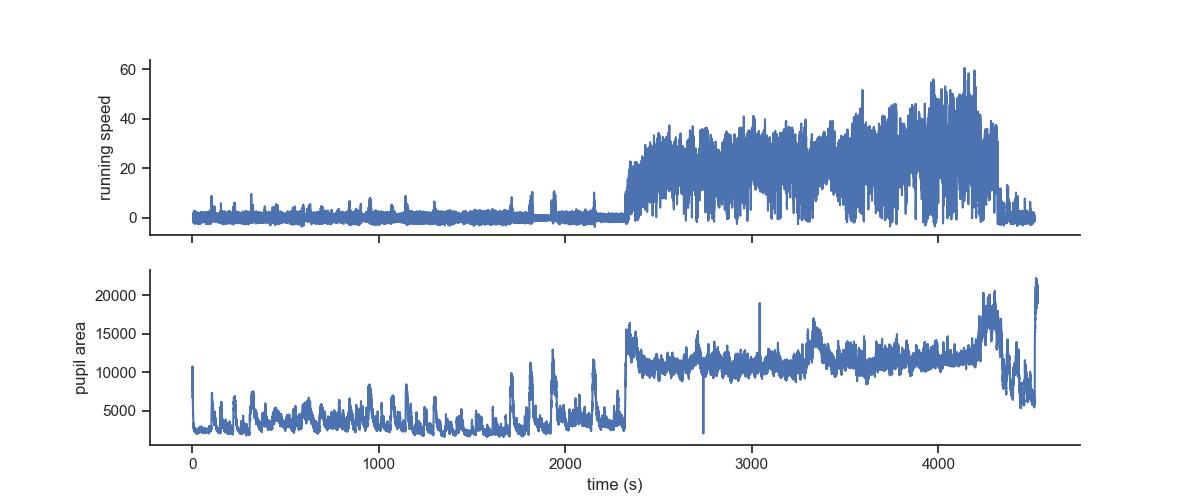

Text(0.5, 0, 'time (s)')

In [174]:
fig,ax=plt.subplots(2,1,figsize=(12,5),sharex=True)
ax[0].plot(session.running_data_df['speed'])
ax[1].plot(session.eye_data.ellipse_fits['pupil']['time'],session.eye_data.ellipse_fits['pupil']['blink_corrected_area'])
ax[0].set_ylabel('running speed')
ax[1].set_ylabel('pupil area')
ax[1].set_xlabel('time (s)')